In [1]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#selektiere nur elektronen von B->K*ee und nur solche mit einem momentum von ueber 5 GeV 
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 1466

ak.num(found, axis=0)
#ak.count(found, axis=None)

9056

In [3]:
def t_eff(found, lost, axis = 0):
    sel = ak.num(found, axis=axis)
    des = ak.num(lost, axis=axis)
    return sel/(sel + des)

t_eff(found, lost)

0.8606728758791105

In [4]:
#finden wir die elektronen die keine bremsstrahlung gemacht haben mit hoher effizienz?
#von energie der photonen abmachen
#scan ab welcher energie der photonen die effizienz abfällt

#abhängigkeit vom ort der emission untersuchen   <- noch nicht gemacht



#idea: we make an event cut st all events that contain a photon of energy > cutoff_energy are not included
"""
ph_e = found["brem_photons_pe"]
event_cut = ak.all(ph_e<cutoff_energy,axis=1)
ph_e = ph_e[event_cut]
"""



for cutoff_energy in range(0,1050,50):
	nobrem_f = found[ak.all(found["brem_photons_pe"]<cutoff_energy,axis=1)]
	nobrem_l = lost[ak.all(lost["brem_photons_pe"]<cutoff_energy,axis=1)]
	print("sample size: ",ak.num(nobrem_f,axis=0)+ak.num(nobrem_l,axis=0))
	print("eff (cutoff = ",str(cutoff_energy),") = ",str(t_eff(nobrem_f,nobrem_l)))

"""
we see that a cutoff energy of 350MeV is ideal because the efficiency drops significantly for higher values
"""
cutoff_energy = 350.0 #MeV

"""
better statistics: cutoff=350MeV - sample size: 150 events and efficiency=0.9533
"""
nobrem_found = found[ak.all(found["brem_photons_pe"]<cutoff_energy,axis=1)]
nobrem_lost = lost[ak.all(lost["brem_photons_pe"]<cutoff_energy,axis=1)]

print("\nsample size: ",ak.num(nobrem_found,axis=0)+ak.num(nobrem_lost,axis=0))
t_eff(nobrem_found, nobrem_lost)

sample size:  32
eff (cutoff =  0 ) =  0.96875
sample size:  32
eff (cutoff =  50 ) =  0.96875
sample size:  32
eff (cutoff =  100 ) =  0.96875
sample size:  43
eff (cutoff =  150 ) =  0.9767441860465116
sample size:  65
eff (cutoff =  200 ) =  0.9692307692307692
sample size:  97
eff (cutoff =  250 ) =  0.9587628865979382
sample size:  129
eff (cutoff =  300 ) =  0.9457364341085271
sample size:  150
eff (cutoff =  350 ) =  0.9533333333333334
sample size:  169
eff (cutoff =  400 ) =  0.9408284023668639
sample size:  197
eff (cutoff =  450 ) =  0.9390862944162437
sample size:  227
eff (cutoff =  500 ) =  0.920704845814978
sample size:  257
eff (cutoff =  550 ) =  0.9260700389105059
sample size:  297
eff (cutoff =  600 ) =  0.9326599326599326
sample size:  334
eff (cutoff =  650 ) =  0.9281437125748503
sample size:  366
eff (cutoff =  700 ) =  0.9289617486338798
sample size:  400
eff (cutoff =  750 ) =  0.925
sample size:  436
eff (cutoff =  800 ) =  0.9151376146788991
sample size:  468
e

0.9533333333333334

In [19]:
def weird_div(n,d):
    return n/d if d else 0

In [13]:
#wie viel energie relativ zur anfangsenergie verlieren die elektronen durch bremstrahlung und hat das einen einfluss darauf ob wir sie finden oder nicht?
#if any photon of an electron has an energy higher the cutoff then it is included
cutoff_energy=350

brem_found = found[ak.any(found["brem_photons_pe"]>=cutoff_energy,axis=1)]
energy_found = ak.to_numpy(brem_found["energy"])
eph_found = ak.to_numpy(ak.sum(brem_found["brem_photons_pe"], axis=-1, keepdims=False))
energyloss_found = eph_found/energy_found

brem_lost = lost[ak.any(lost["brem_photons_pe"]>=cutoff_energy,axis=1)]
energy_lost = ak.to_numpy(brem_lost["energy"])
eph_lost = ak.to_numpy(ak.sum(brem_lost["brem_photons_pe"], axis=-1, keepdims=False))
energyloss_lost = eph_lost/energy_lost

t_eff(brem_found,brem_lost)

0.8593328191284226

In [7]:
mean_energyloss_found = ak.mean(energyloss_found)
mean_energyloss_lost = ak.mean(energyloss_lost)
print("mean energyloss relative to initial energy (found): ", mean_energyloss_found)
print("mean energyloss relative to initial energy (lost): ", mean_energyloss_lost)

mean energyloss relative to initial energy (found):  0.6551043170507098
mean energyloss relative to initial energy (lost):  0.8273131179948844


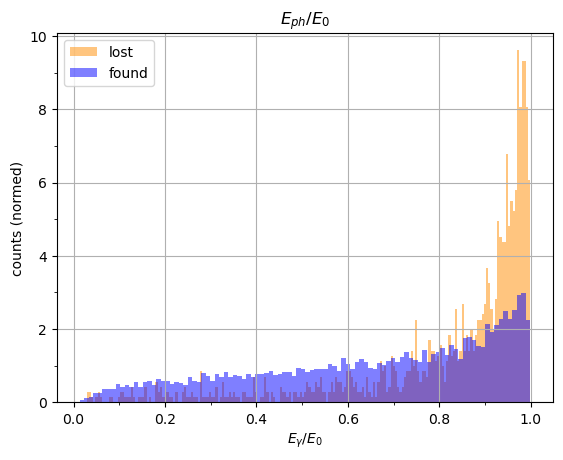

In [14]:
#in abhängigkeit von der energie der elektronen
plt.hist(energyloss_lost, bins=200, density=True, alpha=0.5, histtype='bar', color="darkorange", label="lost")
plt.hist(energyloss_found, bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label="found")
plt.xticks(np.arange(0,1.1,0.1), minor=True,)
plt.yticks(np.arange(0,10,1), minor=True)
plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("counts (normed)")
plt.title(r'$E_{ph}/E_0$')
plt.legend()
plt.grid()

"""

"""

plt.show()

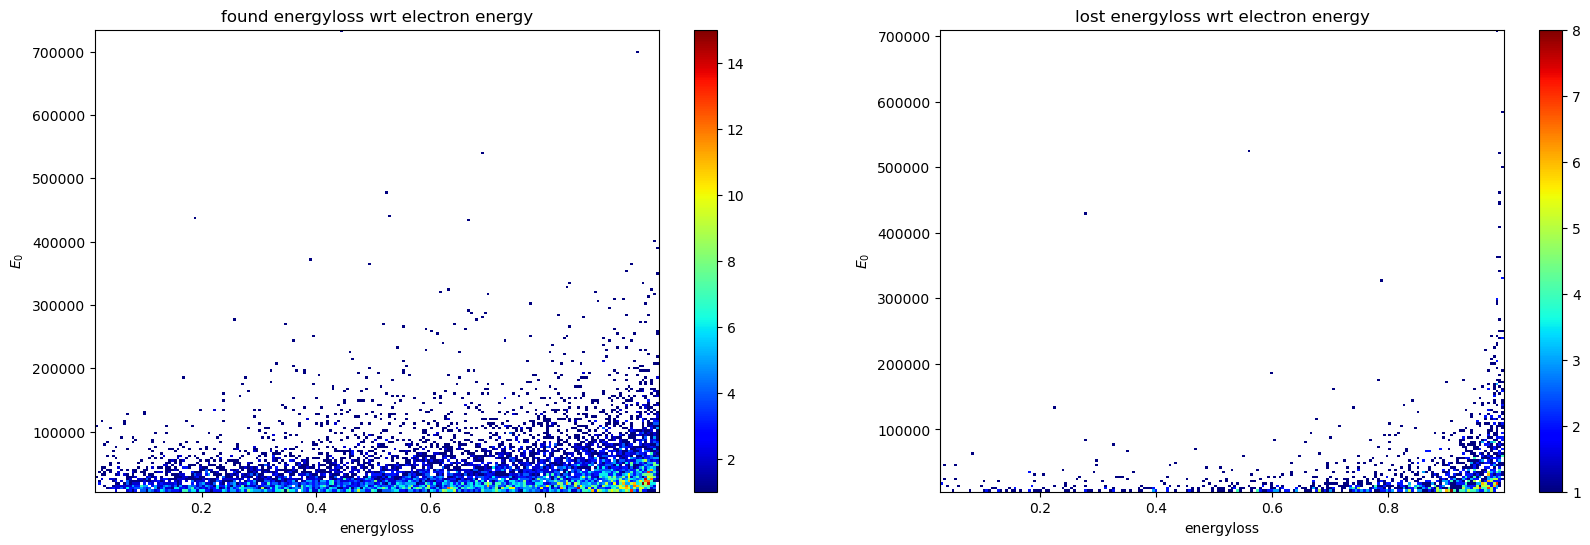

In [21]:
#energyloss in abh von der energie der elektronen
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0=ax0.hist2d(energyloss_found, energy_found, bins=200, cmap=plt.cm.jet, cmin=1)
ax0.set_xlabel("energyloss")
ax0.set_ylabel(r"$E_0$")
ax0.set_title("found energyloss wrt electron energy")
plt.colorbar(a0[3],ax=ax0)

a1=ax1.hist2d(energyloss_lost, energy_lost, bins=200, cmap=plt.cm.jet, cmin=1) 
ax1.set_xlabel("energyloss")
ax1.set_ylabel(r"$E_0$")
ax1.set_title("lost energyloss wrt electron energy")
plt.colorbar(a1[3],ax=ax1)

"""
"""
plt.show()